In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
Age_category = []
for x in df['Age']:
    if x < 10:
        Age_category.append('0대')
    elif x < 20:
        Age_category.append('10대')
    elif x < 30:
        Age_category.append('20대')
    elif x < 40:
        Age_category.append('30대')
    elif x < 50:
        Age_category.append('40대')
    elif x < 60:
        Age_category.append('50대')
    elif x < 70:
        Age_category.append('60대')
    else:
        Age_category.append('70대 이상')

df['Age_category'] = Age_category

In [5]:
df.groupby('Age_category')['Survived'].sum()

Age_category
0대        38
10대       41
20대       77
30대       73
40대       34
50대       20
60대        6
70대 이상    53
Name: Survived, dtype: int64

In [6]:
a=pd.DataFrame(df.groupby('Age_category')['Survived'].sum()/df.groupby('Age_category')['Survived'].count())

In [7]:
a['Unsurvived'] = 1-a['Survived']

In [8]:
a.reset_index(inplace=True)

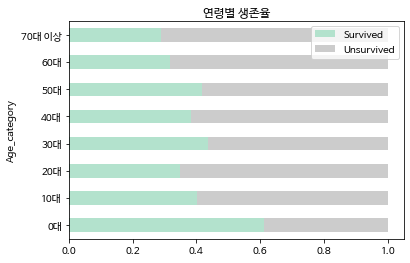

In [17]:
plt.rc('font', family='NanumBarunGothic') 
 
a.plot(x = 'Age_category',  kind = 'barh', stacked = True, title = '연령별 생존율', mark_right = True, colormap='Pastel2')